# Ch07_02.아달라인(Adaline)  함수

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

In [2]:
tiny_df = pd.read_csv('tinydata.csv')
tiny_df.head()

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like


In [3]:
X = tiny_df.drop (['Obs.','Acceptance'], axis=1)
X.head()

,Fat,Salt
0,0.2,0.9
1,0.1,0.1
2,0.2,0.4
3,0.2,0.5
4,0.4,0.5


In [4]:
y = tiny_df['Acceptance']
y = y.replace (['like','dislike'], [1,-1])
y.head()

0    1
1   -1
2   -1
3   -1
4    1
Name: Acceptance, dtype: int64

In [5]:
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        
        # rgen = np.random.RandomState(self.random_state)
        # self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.w_ = [-0.3, 0.05, 0.01]
        self.cost_ = []

        for i in range(self.n_iter):

            print('== 에포크')
            print('n_iter', i)
            print('')

            print('== 초기 가중치(w)')
            print('self.w_: ', self.w_)         
            print('')
                      
            z = self.net_input(X)
            print('== 결합함수(z)')
            print('z: ', z)
            print('')

            h = self.activation(z)
            print('== 활성함수(h)')
            print('h: ', h)
            print('')

            errors = (y - h)
            print('== 에러')
            print('errors: ')
            print(errors)
            print('')

            self.w_[1:] += self.eta * X.T.dot(errors)
            print('== 가중치 업데이트(X)')
            print('X.T.dot(errors): ', X.T.dot(errors))
            print('self.eta * X.T.dot(errors): ', self.eta * X.T.dot(errors))
            print('self.w_[1:]: ', self.w_[1:])         
            print('')

            self.w_[0] += self.eta * errors.sum()
            print('== 가중치 업데이트(b)')
            print('errors.sum(): ', errors.sum())
            print('self.eta * errors.sum(): ', self.eta * errors.sum())
            print('self.w_[0]: ', self.w_[0])
            print('')

            print('== 최종 가중치(전체)')
            print('self.w: ', self.w_)
            print('')
          
            cost = 0.5 * (errors**2).sum()
            print('== 비용함수(J)')
            print('cost: ', cost)
            print('')

            self.cost_.append(cost)
            
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [17]:
ada = AdalineGD(n_iter = 10, eta = 0.2)
ada.fit(X, y)

== 에포크
n_iter 0

== 초기 가중치(w)
self.w_:  [-0.3, 0.05, 0.01]

== 결합함수(z)
z:  [-0.281 -0.294 -0.286 -0.285 -0.275 -0.277]

== 활성함수(h)
h:  [-0.281 -0.294 -0.286 -0.285 -0.275 -0.277]

== 에러
errors: 
0    1.281
1   -0.706
2   -0.714
3   -0.715
4    1.275
5    1.277
Name: Acceptance, dtype: float64

== 가중치 업데이트(X)
X.T.dot(errors):  Fat     0.7929
Salt    2.0983
dtype: float64
self.eta * X.T.dot(errors):  Fat     0.15858
Salt    0.41966
dtype: float64
self.w_[1:]:  [0.20858, 0.42966000000000004]

== 가중치 업데이트(b)
errors.sum():  1.6979999999999997
self.eta * errors.sum():  0.33959999999999996
self.w_[0]:  0.03959999999999997

== 최종 가중치(전체)
self.w:  [0.03959999999999997, 0.20858, 0.42966000000000004]

== 비용함수(J)
cost:  3.2083859999999995

== 에포크
n_iter 1

== 초기 가중치(w)
self.w_:  [0.03959999999999997, 0.20858, 0.42966000000000004]

== 결합함수(z)
z:  [0.46801  0.103424 0.25318  0.296146 0.337862 0.445902]

== 활성함수(h)
h:  [0.46801  0.103424 0.25318  0.296146 0.337862 0.445902]

== 에러
errors: 
0    0.531

In [31]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, -1], 
                    y=X[y == cl, 1],
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [36]:
# 특성을 표준화합니다.
X_std = np.copy(X)

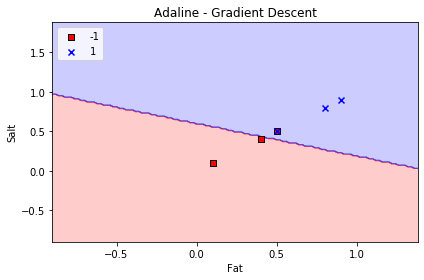

In [37]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Fat')
plt.ylabel('Salt')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

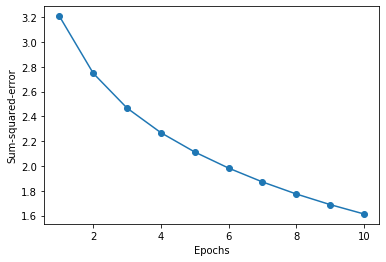

In [24]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()